In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

In [2]:
# importing data from file to numpy array
def import_data(f):
    X = np.loadtxt(f)
    return X

## Part 1

In [3]:
file = "takens_1.txt"
data = import_data(file) # read the data
# separate the columns
x = data[:,0:1]
y = data[:,1:2]

In [4]:
# create time array
time = np.arange(0, x.shape[0])
time = np.reshape(time, (-1, 1))

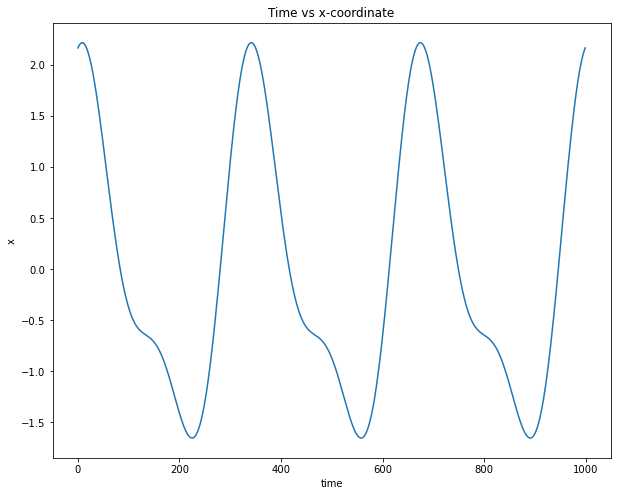

In [5]:
# plot the function over data points to see what it looks like
plt.figure(figsize=(10,8))
plt.plot(time, x)
plt.xlabel("time")
plt.ylabel("x")
plt.title("Time vs x-coordinate")
plt.savefig('timevdata.png')
plt.show()

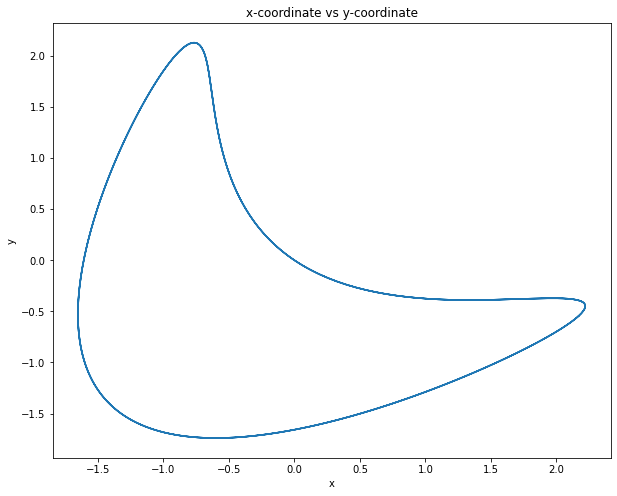

In [6]:
# plot the function over data points to see what it looks like
plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("x-coordinate vs y-coordinate")
plt.savefig('x-y.png')
plt.show()

In [7]:
delta_n = 70 # define delta_n

In [8]:
N = x.shape[0]
N_delta = N - delta_n

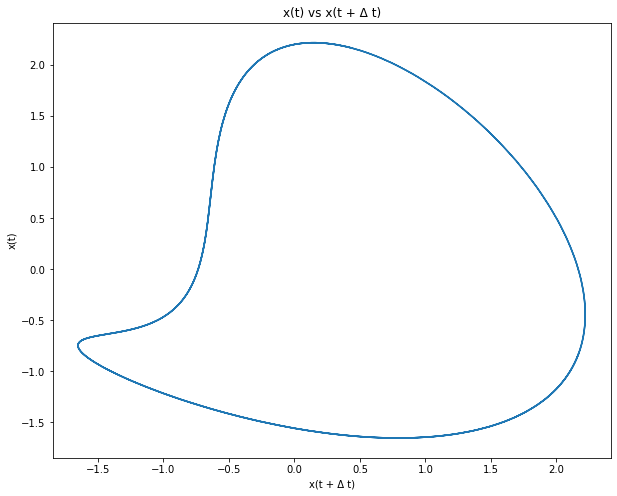

In [9]:
# plot the function over data points to see what it looks like
plt.figure(figsize=(10,8))
plt.plot(x[delta_n:N], x[0:N_delta])
plt.xlabel("x(t + \u0394 t)")
plt.ylabel("x(t)")
plt.title("x(t) vs x(t + \u0394 t)")
plt.savefig('xdeltat.png')
plt.show()

In [10]:
delta_n = 70 # define delta_n

In [11]:
N = x.shape[0]
delta2 = 2*delta_n
N_delta = N - delta_n
N_2delta = N - 2*delta_n

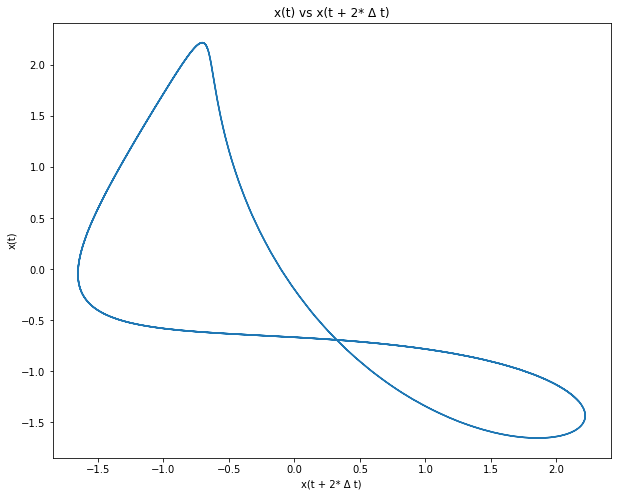

In [12]:
# plot the function over data points to see what it looks like
plt.figure(figsize=(10,8))
plt.plot(x[delta2:N], x[0:N_2delta])
plt.xlabel("x(t + 2* \u0394 t)")
plt.ylabel("x(t)")
plt.title("x(t) vs x(t + 2* \u0394 t)")
plt.savefig('twodelta.png')
plt.show()

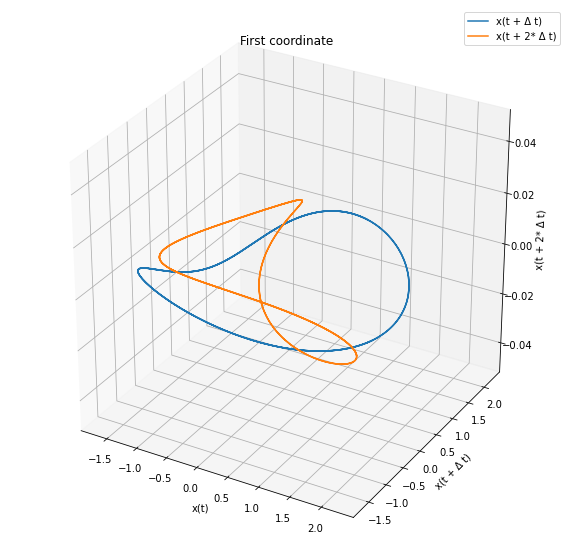

In [13]:
# plot the first coordinate and the next one with time delay
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[delta_n:N], x[0:N_delta])
ax.plot(x[delta2:N], x[0:N_2delta])
ax.set_xlabel("x(t)")
ax.set_ylabel("x(t + \u0394 t)")
ax.set_zlabel("x(t + 2* \u0394 t)")
ax.set_title("First coordinate")
plt.legend(['x(t + \u0394 t)','x(t + 2* \u0394 t)'])
plt.savefig('3dxt.png')
plt.show()

## Part 2

In [14]:
# lorenz function
def lorenz(t, y0):
    x, y, z= y0
    dx = -sigma*(x - y)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return dx, dy, dz

In [15]:
# lorenz parameters
sigma, beta, rho = 10, (8/3), 28
tmax = 1000
x0 = [10, 10, 10]

In [16]:
f = solve_ivp(lorenz, [0, tmax], x0) # using solve_ivp to solve lorenz function
x, y, z = f.y

In [17]:
x.shape

(12538,)

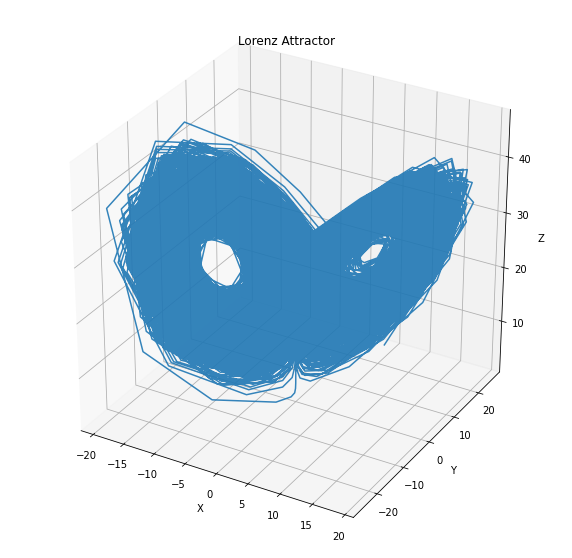

In [18]:
# plotting the lorenz function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(x, y, z, alpha=0.9)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Lorenz Attractor")
plt.draw()
plt.savefig('lorenz.png')
plt.show()

We have plotted both 3D and 2D projections

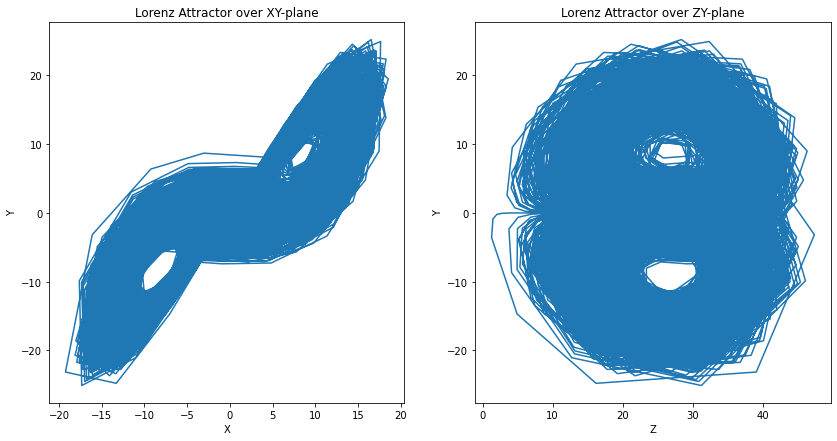

In [19]:
# subplot of projections in 2D
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

# eliminating z-axis
ax1.plot(x, y)
ax1.set_title("Lorenz Attractor over XY-plane")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")

# eliminating x-axis
ax2.plot(z, y)
ax2.set_title("Lorenz Attractor over ZY-plane")
ax2.set_xlabel("Z")
ax2.set_ylabel("Y")

plt.savefig('lorenz-xy-yz subplots.png')
plt.show()

### Creating approximation

In [20]:
delta = 1

In [21]:
# parameters: scalar delta, 1D array x
# returns x, x(t+delta t), x(t + 2*delta t)
def preprocess(delta, x):
    N_lorenz = x.shape[0]
    delta_2 = 2*delta
    x_1 = x # x
    x_2 = x[delta:N_lorenz] # x + delta t
    x_3 = x[delta_2:N_lorenz] # x + 2 * delta t
    lorenz_shape = min(x_1.shape[0], x_2.shape[0], x_3.shape[0]) # pick the minimum of the shapes to avoid dimension problem
    x_1 = x_1[0:lorenz_shape]
    x_2 = x_2[0:lorenz_shape]
    x_3 = x_3[0:lorenz_shape]
    return x_1, x_2, x_3

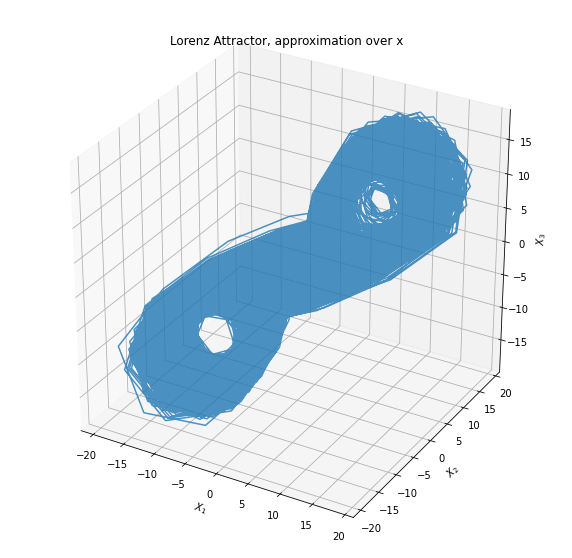

In [22]:
# plotting x1, x2, x3
x_1, x_2, x_3 = preprocess(delta, x)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(x_1, x_2, x_3, alpha=0.8)

ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_zlabel("$X_3$")
ax.set_title("Lorenz Attractor, approximation over x")
plt.draw()
plt.savefig('lorenz-x.png')
plt.show()

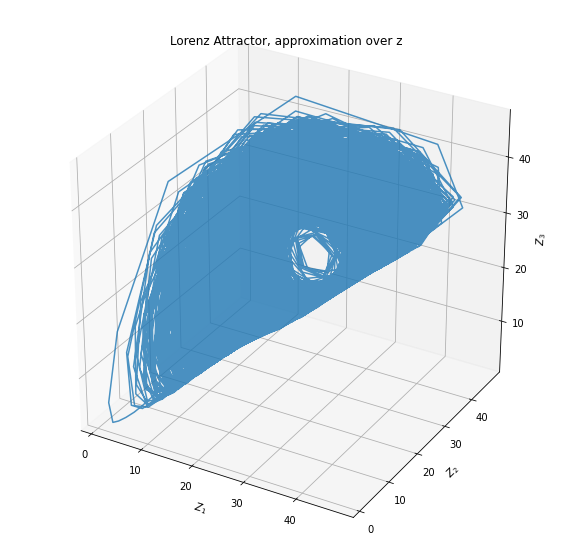

In [23]:
# plotting x1, x2, x3
z_1, z_2, z_3 = preprocess(delta, z)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(z_1, z_2, z_3, alpha=0.8)

ax.set_xlabel("$Z_1$")
ax.set_ylabel("$Z_2$")
ax.set_zlabel("$Z_3$")
ax.set_title("Lorenz Attractor, approximation over z")
plt.draw()
plt.savefig('lorenz-z.png')
plt.show()

## Bonus
The functions for radial basis computation is copied from the previous exercises.

In [24]:
from scipy.integrate import solve_ivp

In [25]:
# least square function with parameters x: data points and y: corresponding outputs of data 
def least_square(x, y, rcond=None):
    Astar = np.linalg.lstsq(x, y, rcond)
    return Astar[0]

In [26]:
# creating the basis x_l for further calculations
# parameters: X numpy array, L scalar
# returns: basis numpy array, eps scalar
def create_basis(X, L):
    basis = np.zeros((L, X.shape[1]))
    rand_arr = np.random.choice(X.shape[0], L, replace=False) # generate L number of indices randomly
    indices = np.sort(rand_arr) # then sort them
    for i in range(0, L):
        x_l = X[indices[i]] # get a randomly selected data point as center basis
        basis[i]= x_l
    distance = np.zeros((L, L))
    for i in range(0, L):
        dist = get_distance(basis[i], basis) # distance array
        distance[i, :] = dist
        
    eps = 0.05 * np.max(distance) # calculate epsilon
    return basis, eps

In [27]:
# calculating radial basis functions, numpy array X: data points, scalar L
def get_RBF(X, L, basis, eps):
    RBF = np.zeros((X.shape[0], L)) # initialize
    for i in range(L):
        dist = get_distance(basis[i], X) # distance array
        RBF[:, i] = dist
        
    epsilon = eps ** 2 #square of epsilon
    RBF = RBF / epsilon # divide the distance with epsilon
    RBF = np.exp(-RBF) # take exponential
    return RBF

In [28]:
# x_l scalar, data points X numpy array
def get_distance(x_l, X):
    d_mat = np.zeros(X.shape) # initialize
    d_mat = (x_l-X)**2 # square distance
    d_mat = np.sum(d_mat, axis = 1) # sum over axis 1
    return d_mat

In [29]:
def find_vector(x, A): #Returns A*x
    v = np.matmul(x, A)
    return v

In [30]:
# calculate phi
# parameters: basis numpy array and eps scalar
def obtain_basis(x, basis, eps):
    epsilon = eps ** 2
    phi = get_distance(x, basis) / epsilon
    phi = np.exp(-phi)
    return phi

In [31]:
# multiply obtained phi with calculated C
def solve_system(t, x, basis, epsilon, C):
    phi = obtain_basis(x, basis, epsilon)
    xt = np.matmul(phi, C)
    return xt

In [32]:
new_delta = 1
N_approx = x_1.shape[0]
x_ax = np.vstack((x_1, x_2, x_3)).T # stack the vectors into matrix

In [33]:
L = 15
basis, epsilon = create_basis(x_ax,L) # create basis with defined L
rbf = get_RBF(x_ax, L, basis, epsilon) # calculate RBF

# approximate vector field
v = (x_ax[new_delta:N_approx] - x_ax[0:(N_approx-new_delta)]) / new_delta

In [34]:
epsilon

99.77055273300418

In [35]:
rbf = rbf[0:v.shape[0]]
# set the size of rbf function the same as approximated vector field to avoid dimensionality problems of numpy
C_hat = least_square(rbf, v) # finding C with least squares

In [36]:
f_rbf = find_vector(rbf, C_hat) # C * phi (x), recreated approximation

In [37]:
#Solving the System for T = 1000 timesteps
t0 = 0 
tend = 1000
t = np.linspace(t0, tend, tend-t0)
initial = [10, 10, 10]
sol = solve_ivp(solve_system, t_span = [t[0], t[-1]], y0 = initial, args = (basis, epsilon, C_hat), t_eval = t)
x1, x2, x3 = sol.y

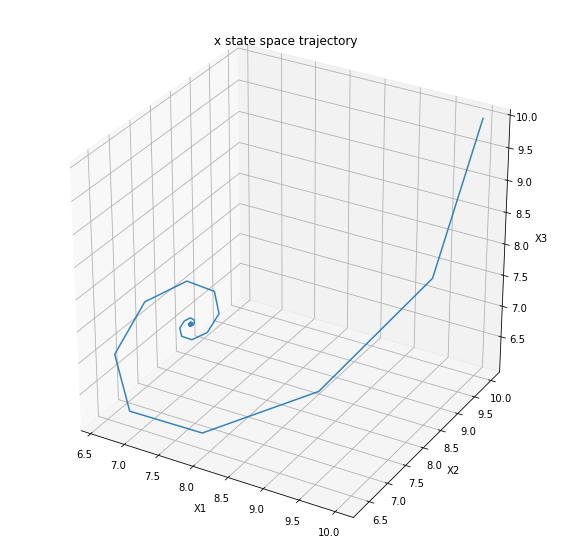

In [38]:
# plotting the lorenz function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.plot(x1, x2, x3, alpha=0.9)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("x state space trajectory")
plt.draw()
plt.savefig('denemebonus.png')
plt.show()

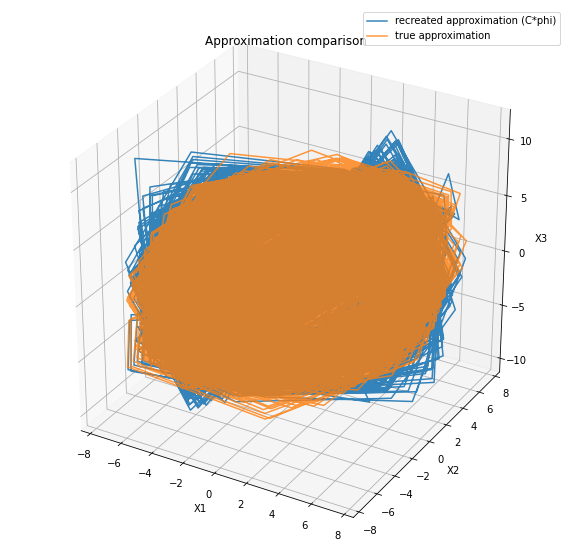

In [41]:
# plotting the approximated vector field and C*phi together
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

ax.plot(f_rbf[:,0], f_rbf[:,1], f_rbf[:,2], alpha=0.9)
ax.plot(v[:,0], v[:,1], v[:,2], alpha=0.8)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
ax.set_title("Approximation comparison")
plt.legend(['recreated approximation (C*phi)', 'true approximation'])
plt.draw()
plt.savefig('spacestate.png')
plt.show()